In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.dpi'] = 50
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

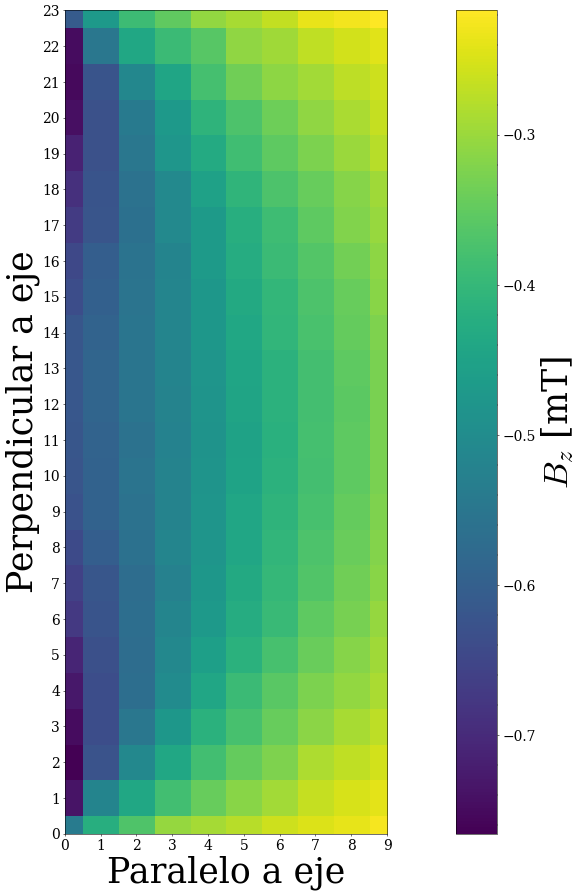

In [21]:
number_of_files = 24*10 #24 rows, 10 columns
avg_vals_BZ = np.empty(number_of_files)

for n in np.arange(number_of_files):
    df = pd.read_csv('campo_x_hall/BZ/'+str(n), delimiter='\t', skiprows=[0,1,2])
    avg_vals_BZ[n] = df['(MT)'].mean()

avg_vals_BZ = np.reshape(avg_vals_BZ, (24,10))

fig, ax = plt.subplots()

yticks = [i for i in range(24)]
xticks = [i for i in range(10)]

cm = ax.imshow(avg_vals_BZ, cmap='viridis', interpolation='none')
cb = fig.colorbar(cm, ax=ax)
cb.minorticks_on()
cb.set_label('$B_z$ [mT]')
ax.set_ylabel('Perpendicular a eje')
ax.set_xlabel('Paralelo a eje')

# ax.axvline(4.5,label='Posición aproximada de eje', color='r', linestyle='--', lw=3)
# ax.axhline(2.5,color='r', linestyle='--', lw=3)

ax.set_xticks(xticks)
ax.set_xticklabels([str(xt) for xt in xticks])

ax.set_yticks(yticks)
ax.set_yticklabels([str(yt) for yt in yticks])

ax.set_ylim((0,23))
ax.set_xlim((0,9))

fig.tight_layout()

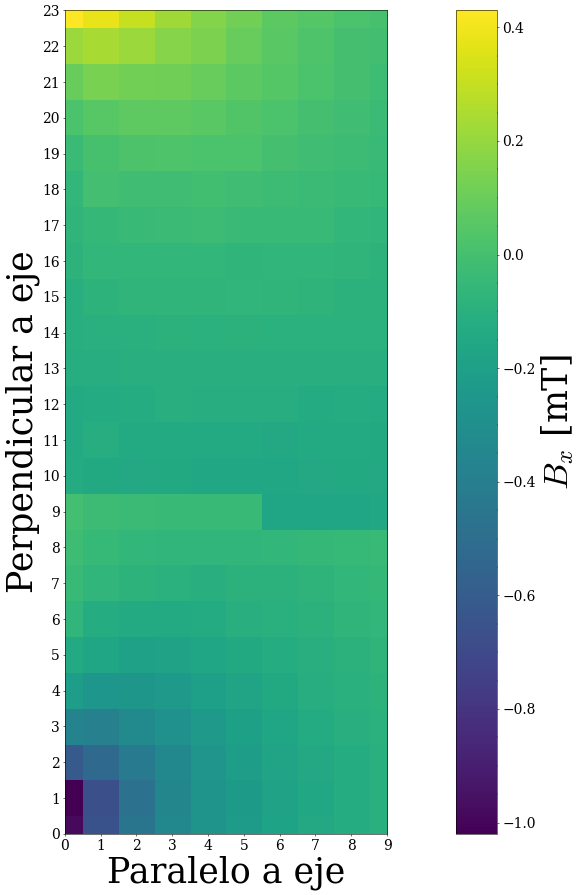

In [22]:
number_of_files = 24*10 #24 rows, 10 columns
avg_vals_BX = np.empty(number_of_files)

for n in np.arange(number_of_files):
    df = pd.read_csv('campo_x_hall/BX/'+str(n), delimiter='\t', skiprows=[0,1,2])
    avg_vals_BX[n] = df['(MT)'].mean()

avg_vals_BX = np.reshape(avg_vals_BX, (24,10))
        
fig, ax = plt.subplots()

yticks = [i for i in range(24)]
xticks = [i for i in range(10)]

cm = ax.imshow(avg_vals_BX, cmap='viridis', interpolation='none')
cb = fig.colorbar(cm, ax=ax)
cb.minorticks_on()
cb.set_label('$B_x$ [mT]')
ax.set_ylabel('Perpendicular a eje')
ax.set_xlabel('Paralelo a eje')

ax.set_xticks(xticks)
ax.set_xticklabels([str(xt) for xt in xticks])

ax.set_yticks(yticks)
ax.set_yticklabels([str(yt) for yt in yticks])

ax.set_ylim((0,23))
ax.set_xlim((0,9))

fig.tight_layout()

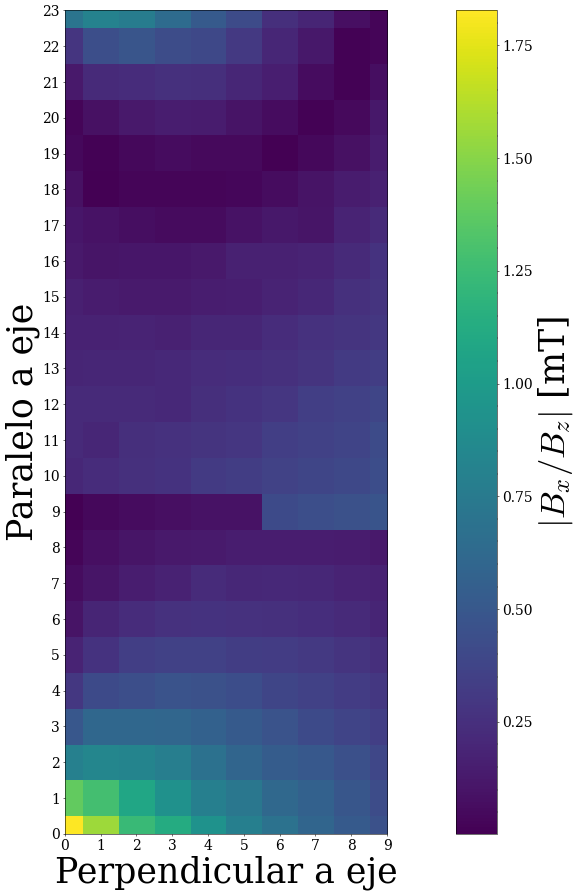

In [24]:
fig, ax = plt.subplots()

yticks = [i for i in range(24)]
xticks = [i for i in range(10)]

cm = ax.imshow(np.abs(avg_vals_BX/avg_vals_BZ), cmap='viridis', interpolation='none')
cb = fig.colorbar(cm, ax=ax)
cb.minorticks_on()
cb.set_label('$|B_x/B_z|$ [mT]')
ax.set_xlabel('Perpendicular a eje')
ax.set_ylabel('Paralelo a eje')

ax.set_xticks(xticks)
ax.set_xticklabels([str(xt) for xt in xticks])

ax.set_yticks(yticks)
ax.set_yticklabels([str(yt) for yt in yticks])

ax.set_ylim((0,23))
ax.set_xlim((0,9))

fig.tight_layout()